# TP7 : Une méthode à deux pas et le pendule simple

### Consignes:
Ce TP est à rendre au plus tard jeudi 30 avril.
Vous essaierez d'être le plus précis possible pour les représentations graphiques, en mettant des titres aux figures, des légendes sur les axes des abscisses et des ordonnées, et si besoin des labels associés aux courbes. 

On s'intéresse à la méthode à deux pas d'Adams-Bashforth. Comme vu en cours, les méthodes d'Adams-Bashforth peuvent être obtenues en calculant $$y_{n+1}=y_n+\int_{t_n}^{t_{n+1}}P_{n,q}(t)dt \tag{E}$$ avec $P_{n,q}(t)$ le polynôme interpolant les valeurs de $f$ en $t_j$ pour $n-q\leq j\leq n$. La méthode à deux pas correspond au cas $q=1$.



## 1 Déduction de la méthode

a) Développer la relation $(E)$ pour $q=1$ afin d'obtenir le schéma à deux pas d'Adams-Bashforth.

REPONSE QUESTION a) : 
Si $q=1$, alors $P_{n,1}(t)$ doit interpoler $f$ en $t_{n-1},t_n$, et sera de degré plus petit ou égal à 1. On a $P_{n,1}(t)=a_1 t + a_0$, avec $$\begin{cases} & P_{n,1}(t_{n-1})=a_1 t_{n-1} + a_0=f(t_{n-1}, y_{n-1}) \\
& P_{n,1}(t_{n})=a_1 t_{n} + a_0=f(t_{n}, y_{n}) .\end{cases}$$ On trouve $$ P_{n,1}(t)=(f(t_n,y_n)-f(t_{n-1},y_{n-1}))\frac{t-t_n}{h}+f(t_n,y_n)$$ et en intégrant cet polynôme on obtient $$ \begin{eqnarray*}\int_{t_n}^{t_{n+1}}(f(t_n,y_n)-f(t_{n-1},y_{n-1}))\frac{t-t_n}{h}+f(t_n,y_n)dt&=&(f(t_n,y_n)-f(t_{n-1},y_{n-1}))\frac{t_{n+1}^2-t_n^2-2t_{n}(t_{n+1}-t_n)}{2h}+f(t_n,y_n)h \\
&=& (f(t_n,y_n)-f(t_{n-1},y_{n-1}))\frac{h}{2}+f(t_n,y_n)h\\
&=& f(t_n,y_n)\frac{3h}{2}-f(t_{n-1},y_{n-1})\frac{h}{2}\end{eqnarray*}. $$ Donc, la méthode d'Adams Bashforth à deux pas s'écrit $$y_{n+1}=y_n+f(t_n,y_n)\frac{3h}{2}-f(t_{n-1},y_{n-1})\frac{h}{2}$$

## 2 Pendule simple

Un pendule simple qu'on écarte de son équilibre d'un angle $\theta_0$ suit l'équation différentielle $$ \begin{cases} & l\ddot{\theta}(t)+g\sin(\theta(t))=0\\
& \dot{\theta}(0)=0  \\
& \theta(0)=\theta_0 
\end{cases}
$$ où $l$ est la longueur du pendule et où $g=9.8 ms^{-2}$ est l'accélération de la gravité. Quand la perturbation est suffisamment petite, on peut faire l'approximation $\sin(\theta_0)\approx \theta_0$ ce qui simplifie les choses, mais au fur et à mesure que l'on augmente $\theta_0$, cette approximation ne tient plus et il faut considérer l'équation complète.




a) Mettre l'équation sous la forme d'un système d'équations du 1er ordre du type $\dot \Theta(t) = F(\Theta(t),t)$, en introduisant la vitesse angulaire $\omega=\dot \theta$ et en posant $\Theta=(\theta,\omega)$.

REPONSE QUESTION a) : on pose $\Theta=(\theta,\omega)$ alors $\dot \Theta(t) = F(\Theta(t),t) = (\omega, \frac{-g}{l}\sin(\theta))$


b)  Importer les fonctions et packages dont vous aurez besoin (math.pi, cos, etc... et numpy, scipy.linalg, scipy.integrate, matplotlib.pyplot...), définir la constante $g$ et définir une fonction $F$ qui rend la même chose que dans la question précédente, et qui prend comme arguments $\Theta$ et $t$ et le paramètre $l$.

In [37]:
import numpy as np # donne acces a la librairie numpy, et definit l'abbreviation np
import scipy        # donne acces aux librairies scipy, scipy.linalg et scipy.integrate
import scipy.linalg
import scipy.integrate
import matplotlib.pyplot as plt # donne acces a la librairie matplotlib.pyplot, et definit l'abbreviation plt
import math     # donne acces aux fonctions et constantes mathematiques
from scipy.integrate import odeint


g=9.8
l=10
def F(theta,t,l):
    F=np.array([theta[1],(-g / l) * np.sin(theta[0])])
    return F

def F1(theta,t):     # J'aurais besoin de cette deuxième fonction dans la question j 
    l=10
    F=np.array([theta[1],(-g /l) * theta[0]])
    return F

c) Tracer le champ de vecteurs associé à ce problème dans le pavé $[-2\pi,2\pi]\times[-3,3]$. Selon la valeur des paramètres initiaux $\theta(0)$ et $\dot \theta(0)$, quels seront les différents comportements des trajectoires?

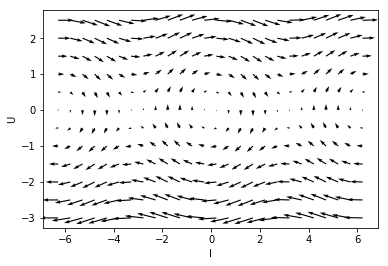

In [38]:

# Discrétiser les deux variables
x1min    = -2 * np.pi
x1max    = 2 * np.pi
dx1      = 0.5
x1       = np.arange(x1min,x1max,dx1)
x2min    = -3
x2max    = 3
dx2      = 0.5
x2=np.arange(x2min,x2max,dx2)


# Calculer le champ de vecteur
XX1,XX2 = np.meshgrid(x1,x2)
U        = XX2
V        = (-g/l) * np.sin(XX1)

# Plot la figure
Q=plt.quiver(XX1,XX2,U,V)      
plt.xlabel('I')
plt.ylabel('U')

plt.show()

REPONSE QUESTION c)

d) Définir une fonction $\mathtt{AB(theta0,l,T,N)}$ qui à partir d'une condition initiale $\theta_0$, d'une longueur $l$, d'un temps final $T$ et d'un nombre de subdivisions $N$ calcule l'approximation de la solution par la méthode d'Adams-Bashforth à deux pas définie plus haut. Comme il s'agit d'une méthode à deux pas, on choisira d'utiliser la méthode d'Euler explicite pour obtenir le premier itéré.

In [39]:
def AB(theta0,l,T,N):
    dt=T/N
    TPS=np.linspace(0,T,N+1)
    
    Y = np.zeros((N+1,2)) #initialise Y en une liste de vecteurs nulles
    Y[0]=np.array([theta0,0])
    Y[1]=Y[0] + dt * F(Y[0],TPS[0],l) # on initialise Y_1 avec la formule d'euler Explicite
    
    for i in range(2,N+1) :
        Y[i] = Y[i-1] + (F(Y[i-1],TPS[i-1],l) * 3*(dt/2)) - (F(Y[i-2],TPS[i-2],l) * (dt/2))
    return Y
    

e) Calculer l'approximation de la solution pour $T=15$ et $N=10000$. Dans une grille 4x4, en utilisant subplots, tracer dans chaque repère la position $\theta$ et la vitesse $\omega$ pour les longueurs $l\in\{1,2.5,5,10\}$ (de haut en bas) et les conditions initiales $\theta_0\in\{\frac{\pi}{4},\frac{\pi}{2},\frac{3\pi}{4},\frac{9\pi}{10}\}$ (de gauche à droite).

##### ATTENTION à la taille des figures, il faut qu'elles soient lisibles!



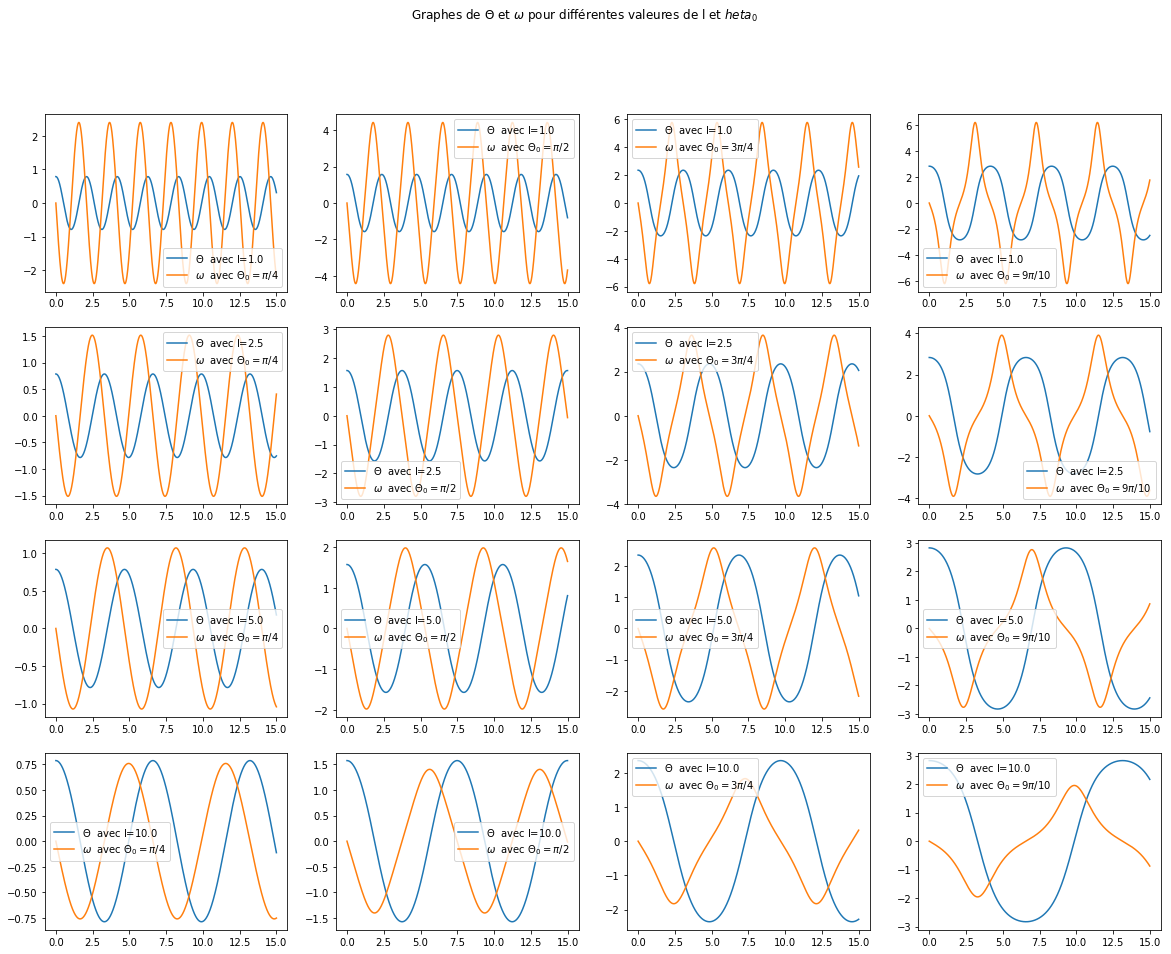

In [40]:
T=15
N=10000

fig, ((ax1, ax2, ax3, ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16)) = plt.subplots(4,4,figsize=(20,15))
dico_ = dict()
l_=[1.,2.5,5.,10.]
theta_=[(np.pi / 4),(np.pi / 2),((3 * np.pi) / 4),((9 * np.pi) / 10)]

dico1_={ax1:(0,0),ax2:(1,0),ax3:(2,0),ax4:(3,0),ax5:(0,1),ax6:(1,1),ax7:(2,1),ax8:(3,1),ax9:(0,2),ax10:(1,2),ax11:(2,2),ax12:(3,2),ax13:(0,3),ax14:(1,3),ax15:(2,3),ax16:(3,3)}
t_=np.linspace(0,T,N+1)
pi_=['$\pi/4$','$\pi/2$','$3\pi/4$','$9\pi/10$']

for ax in dico1_:
    
    a,b = dico1_[ax] # récupère les indices
    theta0 = theta_[a]
    l = l_[b]

    Y=AB(theta0,l,T,N)
    ax.plot(t_,Y[:,0],label='$\Theta$  avec l='+str(l))
    ax.plot(t_,Y[:,1],label='$\omega$  avec $\Theta_0 =$'+str(pi_[a]))
    ax.legend()
    
plt.suptitle('Graphes de $\Theta$ et $\omega$ pour différentes valeures de l et $\theta_0$')   
plt.show()        

f) Quels sont les effets observés sur l'amplitude du mouvement $\theta_{max}$ et sur a vitesse maximale $\omega_{max}$ lorsque l'on augmente $l$?

REPONSE QUESTION f) : On remarque que lorsque l augmente, l'amplitude du mouvement $\theta_{max}$ diminue tandis que $\omega_{max}$ reste inchangé ce qui est logique vu que l'on divise par l dans l'expression de la fonction second membre.

g) Quels sont les effets observés sur l'amplitude du mouvement $\theta_{max}$ et sur a vitesse maximale $\omega_{max}$ lorsque l'on augmente $\theta_0$?

REPONSE QUESTION g): lorsque $\theta_0$ augmente, l'amplitude du mouvement $\theta_{max}$ ainsi que $\omega_{max}$ augmentent. La période également augmente.

On peut se demander à quel point la simplification du problème en oscillateur harmonique s'écarte du problème réel au fur et à mesure que l'on augmente $\theta_0$. On rappelle que l'équation de l'oscillateur harmonique est la suivante $$ \begin{cases} & l\ddot{\theta}(t)+g\theta(t)=0\\
& \dot{\theta}(0)=0  \\
& \theta(0)=\theta_0.
\end{cases}
$$
h) Tracer pour $T=100$, $N=10000$, $l=10$ et $\theta_0=\frac\pi 4$ l'évolution temporelle de la position de la solution exacte de l'oscillateur harmonique et de l'approximation par Adams-Bashforth de la solution du pendule.

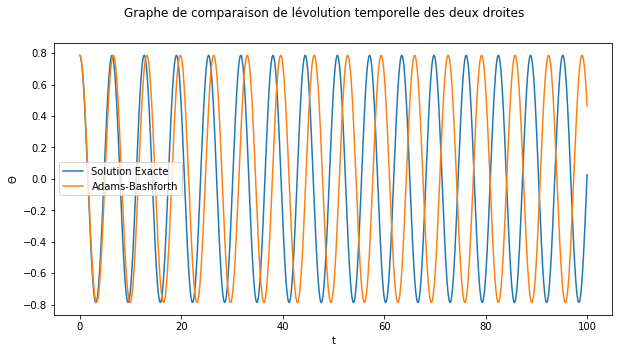

In [51]:
T = 100
N = 10000
l = 10
theta0=np.pi / 4
t_=np.linspace(0,T,N+1)

fig, ax = plt.subplots(1,1,figsize=(10,5))
Y=AB(theta0,l,T,N)
Yexa=odeint(F1,np.array([theta0,0]),t_)
            
plt.plot(t_,Yexa[:,0],label='Solution Exacte')
plt.plot(t_,Y[:,0],label='Adams-Bashforth')

plt.suptitle('Graphe de comparaison de lévolution temporelle des deux droites')
plt.legend() 
plt.xlabel('t')
plt.ylabel('$\Theta$')

plt.show()


i) Qu'observe-t-on sur cette comparaison en temps long entre la solution de l'oscillateur harmonique et l'approximation par Adams-Bashforth de la solution du pendule?

REPONSE QUESTION i): J'observe une superposition des courbes d'Adams-Bashforth et la solution exacte

j) Comparer les trajectoires dans l'espace de phases pour $T=15$, $N=10000$ et $l=10$ de la solution exacte de l'oscillateur harmonique et de l'approximation par Adams-Bashforth de la solution du pendule pour $\theta_0\in\{\frac{\pi}{10},\frac{\pi}{3},\frac{2\pi}{3},\frac{9\pi}{10}\}$. Vous utiliserez subplots pour la visualisation graphique.

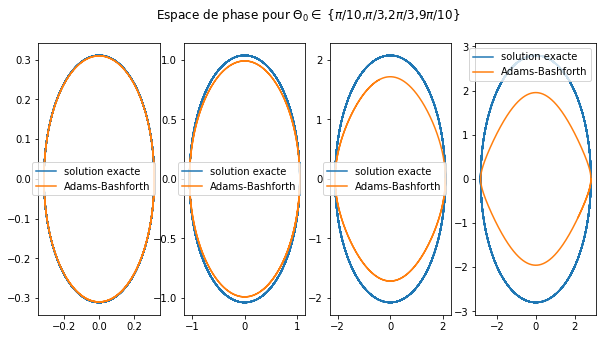

In [55]:
T=15
N=10000
l=10
theta_=[np.pi/10, np.pi/3, 2* np.pi/3, 9* np.pi /10]

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(10, 5))
dico_={ax1:0,ax2:1,ax3:2,ax4:3}

for ax in dico_:
    a=dico_[ax]
    theta0=theta_[a]
    theta=np.array([theta0,0])
    Yexa=odeint(F1,theta,t_)
    Y=AB(theta0,l,T,N)
    ax.plot(Yexa[:,0],Yexa[:,1], label='solution exacte')
    ax.plot(Y[:,0],Y[:,1], label='Adams-Bashforth')
    #ax.plot(Y[:,0],Y[:,1],label='Y(t)')
    #ax.plot(Y0[0],Y0[1],'x',label='Y_0')
    ax.legend()
    
plt.suptitle('Espace de phase pour $\Theta_0 \in$ {$\pi/10$,$\pi/3$,$2\pi/3$,$9\pi/10$}')
plt.show()

k) Commenter les figures obtenues à la question précédente: que dire de la simplification du problème du pendule en oscillateur harmonique?

REPONSE QUESTION k): On remarque que plus $\Theta_0$ augmente, plus l'approximation d'Adams-Bashforth s'éloigne de de l'oscillateur harmonique. Simplifier le problème du pendule en oscillateur harmonique n'est possible que pour une petite valeur de $\Theta_0$